Dieses Material ist lizensiert unter der Lizemz <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a> <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/80x15.png" /></a>.

<h2>
    Graphen komplexer Funktionen
</h2>
Die Graphen komplexer Funktionen sind Teile des 4-dimensional $(x,y,u,v)$-Raumes, die durch $u=f_r(x,y)=\Re(f(x+iy), v=f_i(x+iy=\Im(f(x+iy)))$ definiert sind:

In [1]:
var('d,p,q,r,u,v,x,y,z')
assume(x,'real');assume(y,'real');assume(u,'real');assume(u,'real')
dmin=-2;dmax=2
pmin=-4;pmax=4
qmin=-4;qmax=4
rmin=-4;rmax=4
x_min=-2;x_max=2
y_min=-2;y_max=2
umin=-2;umax=2
vmin=-2;vmax=2
# Ändern Sie das Folgende, um eine andere Definition zu verwenden
f(z)=e^z
#f(z)=z^3
f_r(x,y)=f(x+I*y).real().simplify_full()
f_i(x,y)=f(x+I*y).imag().simplify_full()
show(LatexExpr("f(z)=f(x+iy)="),f(z), LatexExpr(", u=f_r(x,y)=\Re(f(x+iy))="),f_r(x,y),LatexExpr(", v=f_i(x,y)=\Im(f(x+iy))="),f_i(x,y))
def N3(x): return N(x,digits=3)

f(z)=f(x+iy)= e^z , u=f_r(x,y)=\Re(f(x+iy))= cos(y)*e^x , v=f_i(x,y)=\Im(f(x+iy))= e^x*sin(y)

Diese explizit definierten Graphen lassen sich auch implizit definieren, z.B. durch die Gleichung $(u-\Re(f(x+iy)))^2+(v-\Im(f(x+iy)))^2=0$. Leider kann aber Sage so definierte Flächen und Funktionen nicht darstellen. Deshalb müssen wir etwas anders vorgehen.  
Als Erstes legen wir wieder die Bewegungsrichtung des 3-dimensionalen Raumes $R$ fest und bestimmen die Norm und den zugehörigen Einheitsvektor.

In [2]:
@interact
def _(n_x1=slider(x_min,x_max,default=1,label="$n_x$",step_size=0.1),n_y1=slider(y_min,y_max,default=1,label="$n_y$",step_size=0.1),n_u1=slider(umin,umax,default=1,label="$n_u$",step_size=0.1),n_v1=slider(vmin,vmax,default=1,label="$n_v$",step_size=0.1)):
    global n_x
    n_x=n_x1
    global n_y
    n_y=n_y1
    global n_u
    n_u=n_u1
    global n_v
    n_v=n_v1
    global vn
    vn=vector([n_x,n_y,n_u,n_v])
    show(LatexExpr("\\vec{n} = \\begin{pmatrix} n_x \\\\ n_y \\\\ n_u \\\\n_v\\end{pmatrix} ="),latex(n(vn.column(),digits=2)))
    global d_n
    d_n=vn.norm()
    global e_n
    e_n=(1/d_n)*vn
    global e_nx; global e_ny; global e_nu; global e_nv
    e_nx=e_n[0]; e_ny=e_n[1]; e_nu=e_n[2]; e_nv=e_n[3]
    show(LatexExpr("d_n="),N(d_n,digits=3),LatexExpr(", \\vec{e_n}="),N3(e_n.column()))

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjQxMzgxN2RhMjg+IHdpdGggNCB3aWRnZXRzCiAgbl94MTogVHJhbnNmb3JtRmxvYXRTbGlkZXIodmFsdWU9MS4wLCBkZXPigKY=


Wir berechnen ein Orthonormalsystem $K'_n$ für den 4-dimensionalen Raum, das den Vektor $\vec{e_n}$ enthält:

In [3]:
M_n=matrix(RR,e_n.column())
B=M_n.kernel().basis()
a_1=B[0];a_2=B[1]; a_3=B[2]
M_n=matrix(RR,e_n.column())
B=M_n.kernel().basis()
a_1=B[0];a_2=B[1]; a_3=B[2]
BB,CC=matrix(RDF,B).gram_schmidt(orthonormal=True)
b_1=BB[0]; b_2=BB[1]; b_3=BB[2]
b_1x=b_1[0];b_1y=b_1[1];b_1u=b_1[2]; b_1v=b_1[3]
b_2x=b_2[0];b_2y=b_2[1];b_2u=b_2[2]; b_2v=b_2[3]
b_3x=b_3[0];b_3y=b_3[1];b_3u=b_3[2]; b_3v=b_3[3]
show(LatexExpr("\\vec{b_1}="),N3(b_1.column()),LatexExpr(",\\vec{b_2}="),N3(b_2.column()),LatexExpr(",\\vec{b_3}="),N3(b_3.column()),LatexExpr(",\\vec{e_n}="),N3(e_n.column()))

\vec{b_1}= [-0.707]
[-0.000]
[-0.000]
[ 0.707] ,\vec{b_2}= [ 0.408]
[-0.816]
[ 0.000]
[ 0.408] ,\vec{b_3}= [ 0.289]
[ 0.289]
[-0.866]
[ 0.289] ,\vec{e_n}= [0.500]
[0.500]
[0.500]
[0.500]

Die Richtungsvektoren vom Endpunkt von $\vec{n}$ zu $\vec{n}+\vec{b_1}, \vec{n}+\vec{b_2}, \vec{n}+\vec{b_3},\vec{n}+\vec{e_n}$ bilden dann ein Koordinatensystem $K'_n$, für den 4-dimensionalen Raum, dessen erste 3 Koordinatenachsen im 3-dimensionalen Raum $R$ von R3D3 liegen.  
Ein Punkt $P$, des 4-dimensionale Raumes habe bezüglich $K'_n$ eine Darstellung $\vec{P}=\begin{pmatrix}p \\ q \\ r \\s\end{pmatrix}$. Wir können die Koordinaten $\vec{X}$ von $P$ im kanonischen Koordinatensystem als $\vec{X}=\vec{n}+\begin{pmatrix} \vec{b_1} & \vec{b_2} & \vec{b_3} & \vec{e_n}\end{pmatrix}\cdot\vec{P}$ berechnen.  
Bewegt sich $R$ in Richtung des Normalenvektors $\vec{n}=d_n\vec{e_n}$ durch den Raum, so nimmt die Koordinatentransformation von $K'_n$ in das Standard-Koordinatensystem des 4-dimensionalen Raumes - für einen variablen Abstand $d$ vom Ursprung - die folgende Form an.
$$
X_x(d,p,q,r,s)=d\cdot e_{nx}+b_{1x}p+b_{2x}q+b_{3x}r+e_{nx}s \\
X_y(d,p,q,r,s)=d\cdot e_{ny}+b_{1y}p+b_{2y}q+b_{3y}r+e_{ny}s \\
X_u(d,p,q,r,s)=d\cdot e_{nu}+b_{1u}p+b_{2u}q+b_{3u}r+e_{nu}s \\
X_v(d,p,q,r,s)=d\cdot e_{nv}+b_{1v}p+b_{2v}q+b_{3v}r+e_{nv}s
$$

Die dazu inverse Transformation ist $\vec{P} = \begin{pmatrix}\vec{b_1}\\ \vec{b_2} \\ \vec{b_3} \\ \vec{e_n}\end{pmatrix}\cdot (\vec{X}-\vec{n})$. Da die $\vec{b_i}$ und $\vec{n}=d\cdot\vec{e_n}$ orthogonal sind, können die ersten Komponenten zu $\vec{b_i}\cdot \vec{X}$ vereinfacht werden ($i=1,2,3$) und da $\vec{e_n}$ ein Einheitsvektor ist, ist die vierte Komponente durch $\vec{e_n}\cdot \vec{X}-d$ definiert. also
$$
\begin{align}
P_x(d,x,y,u,v)&=b_{1x}x+b_{1y}y+b_{1u}u+b_{1v}v \\
P_y(d,x,y,u,v)&=b_{2x}x+b_{2y}y+b_{2u}u+b_{2v}v \\
P_u(d,x,y,u,v)&=b_{3x}x+b_{3y}y+b_{3u}u+b_{3v}v \\
P_v(d,x,y,u,v)&=e_{nx}x+e_{ny}y+e_{nu}u+e_{nv}v-d
\end{align}
$$
Dass die ersten 3 Gleichung nicht mehr von $d$ abhängen wird verständlich, wenn man sich klarmacht, dass sich die Koordinaten in einem Koordinatensystem, das sich längs einer Koordinatenachse bewegt, nur in der Richtung der Bewegungsachse ändern.

In [4]:
X_x(d,p,q,r,s)=d*e_nx+b_1x*p+b_2x*q+b_3x*r+e_nx*s
X_y(d,p,q,r,s)=d*e_ny+b_1y*p+b_2y*q+b_3y*r+e_ny*s
X_u(d,p,q,r,s)=d*e_nu+b_1u*p+b_2u*q+b_3u*r+e_nu*s
X_v(d,p,q,r,s)=d*e_nv+b_1v*p+b_2v*q+b_3v*r+e_nv*s

P_x(d,x,y,u,v)=b_1x*x+b_1y*y+b_1u*u+b_1v*v
P_y(d,x,y,u,v)=b_2x*x+b_2y*y+b_2u*u+b_2v*v
P_u(d,x,y,u,v)=b_3x*x+b_3y*y+b_3u*u+b_3v*v
P_v(d,x,y,u,v)=e_nx*x+e_ny*y+e_nu*u+e_nv*v-d


Ein Punkt $\vec{X}$, dessen Koordinaten im Standardkoordinatensystem bekannt sind, liegt auf dem Graphen der Funktion genau dann, wenn seine Koordinaten den Gleichungen $u=\Re{f(x+iy)}, v=\Im{f(x+iy)}$ genügen. 
Ins $(p,q,r)$-System übertragen bedeutet dies
$$
X_u=\Re(f(X_x+iX_y)) \\
X_v=\Im(f(X_x+iX_y))
$$
Dabei wurden die Argumente $p,q,r,s$ der Funktione $X_*$ weggelassen.  
Damit der Punkt außerdem in $R$ liegt, muss die Koordinate $s$ in der Richtung von $\vec{n_e}$, die aus $R$ herauszeigt, $0$ sein.
$$
s=0
$$
Damit zeigt die folgende Abbildung den Realteil von $f$ in rot und den Imaginärteil in grün. Auf dem Graphen liegen die Punkte, die auf beiden Flächen liegen, also auf den Kurven, die den Durchschnitt beider Flächen bilden. Nur diese Kurven sieht R3D3 beim Durchgang von $R$ durch den Graphen der Funktion $f$.

In [5]:
from sage.manifolds.utilities import set_axes_labels
@interact
def _(d1=slider(dmin,dmax,default=d_n,label="$d$",step_size=0.1)):
    global d_n
    d_n=d1
    xx=X_x(d1,p,q,r,0)
    yy=X_y(d1,p,q,r,0)
    uu=X_u(d1,p,q,r,0)
    vv=X_v(d1,p,q,r,0)
    G_r=uu.simplify_full()==f_r(xx,yy).simplify_full()
    G_i=vv.simplify_full()==f_i(xx,yy).simplify_full()
    p_r=implicit_plot3d(G_r,(p,pmin,pmax),(q,qmin,qmax),(r,rmin,rmax),color="red",opacity=0.4)
    p_i=implicit_plot3d(G_i,(p,pmin,pmax),(q,qmin,qmax),(r,rmin,rmax),color="green",opacity=0.2)
    plot=set_axes_labels(p_r+p_i,'p','q','r', color='red')
    show(plot,viewer="threejs")

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHg3ZjNmMzk4N2UxYjg+IHdpdGggMSB3aWRnZXQKICBkMTogVHJhbnNmb3JtRmxvYXRTbGlkZXIodmFsdWU9Mi4wLCBkZXNjcmnigKY=


Hier können Sie den Real- und Imaginärteil aus der obigen Graphik beim Durchgang durch $R$ in einer Animation betrachten (die Berechnung kann etwas dauern).

Animation with 8 frames
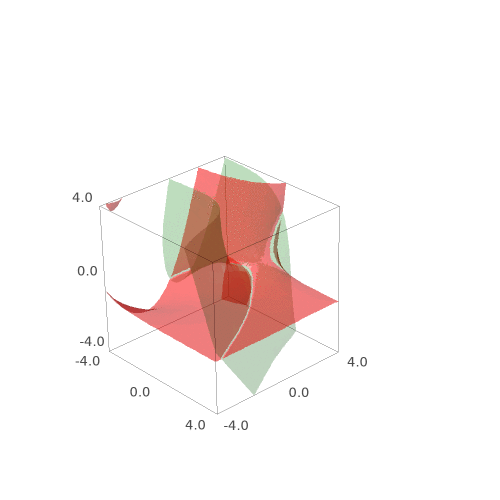

In [6]:
var('d1')
#p_r=implicit_plot3d(X_u(d1,p,q,r,0)==f_r(X_x(d1,p,q,r,0),X_y(d1,p,q,r,0)),(p,pmin,pmax),(q,qmin,qmax),(r,rmin,rmax),color="red",opacity=0.4)
res=[implicit_plot3d(X_u(d1,p,q,r,0)==f_r(X_x(d1,p,q,r,0),X_y(d1,p,q,r,0)),(p,pmin,pmax),(q,qmin,qmax),(r,rmin,rmax),color="red",opacity=0.4)+implicit_plot3d(X_v(d1,p,q,r,0)==f_i(X_x(d1,p,q,r,0),X_y(d1,p,q,r,0)),(p,pmin,pmax),(q,qmin,qmax),(r,rmin,rmax),color="green",opacity=0.2) for d1 in sxrange(dmin,dmax,0.5)]
a=animate(res)
show(a)

Warum erscheint bei R3D3 eine Menge von Kurven als Bild der Funktion $f$, während eine implizit definierte Funktion von $x,y,u,v$, z.B. die Oberfläche einer 4-dimensionalen Kugel, als eine Fläche erscheint? Dies liegt daran, dass eine 4-dimensional Kugeloberfläche eine 3-dimensional Mannigfaltigkeit ist. Der Schnitt mit einem 3-dimensionalen Raum ergibt i. Allg. eine 2-dimensionalen Raum - eine Fläche. Sowohl die implizite Definition als auch die Definition des 3-dimensionalen Raumes legen jeweils einen der vier Freiheitsgrade im 4-dimensionalen fest - übrig bleiben die 2 Freiheitsgrad, die für die Definition von Flächen benötigt werden. Im Unterschied dazu wird der Graph einer komplexen Funktion durch zwei Gleichungen mit reellen Variablen und Werten definiert. Damit werden 2 Dreiheitsgerade festgelegt. Die Definition des 3-dime3nsionalen Unterraums legt einen weiteren Freiheitsgrad fest - übrig bleibt nur ein Freiheitsgrad, mit dem dann nur Kurven definiert werden können.

<h3>
    Real- und Imaginärteil
</h3>
Real- und Imaginärteil einer komplexen Funktion lassen sich als Flächen über der $(x,y)$-Ebene darstellen. Die 3. Koordinatenachse muss dazu in Richtung der $u$- bzw. $v$-Achse zeigen. Um etwa den Realteil darzustellen, könnten wir den Normalenvektor in Richtung der $v$-Achse zeigen lassen, also $\vec{n}=\vec{e_n}=\begin{pmatrix}0 \\ 0 \\ 0 \\1\end{pmatrix}$.  
Dann können wir $\vec{b_1}=\begin{pmatrix}1 \\ 0 \\ 0 \\0\end{pmatrix},\vec{b_2}=\begin{pmatrix}0 \\ 1 \\ 0 \\0\end{pmatrix},\vec{b_3}=\begin{pmatrix}0 \\ 0 \\ 1 \\0\end{pmatrix}$ setzen und erhalten $p=x, q=y, r=u$. Die Gleichung $r=u=\Re(f(x+iy))$ definiert dann die (rote) Fläche, die den Realteil der Funktion darstellt. Wie wir oben gesehen haben, sind diese Werte auch unabhängig von $d$, da die 3 Achsen unseres Koordinatensystems orthogonal zur Bewegungsrichtung $\vec{n}$ liegen.  

Aber was ist mit der grünen Fläche, die durch den Imaginärteil - genauer: Durch die Gleichung $X_v(d,p,q,r,0)=f_i(X_x(d,p,q,r,0)+iX_y(d,p,q,r,0)))$ - definiert wird? Diese Gleichung vereinfacht sich in unserem Fall zu $d=f_i(p+iq)$. Daran ist zunächst bemerkenswert, dass in dieser Gleichung nur $p$ und $q$ vorkommen. Erfüllt $(p,q)$ diese Gleichung, so auch $(p,q,r)$ für beliebige $r$, d.h. mit dem durch $(p,q,0)$ definierten Punkt $P_{pq}$ der $(p,q)$-Ebene liegt auch jeder Punkt über bzw. unter $P_{pq}$ auf der grünen Fläche - sie steht in $P_{pq}$ senkrecht auf der $(p,q)$-Ebene.  
Zwei Sonderfälle sind noch von Interesse. Hat die Gleichung $d=\Im{f(x+iy)}$ keine Lösung, die grüne Fläche ist leer und R3D3 sieht überhaupt nichts. Gilt $d=\Im{f(x+iy)}$ aber für alle $x,y$, so füllt die grüne Fläche den ganzen Raum aus und R3D3 sieht den Realteil von $f$ als 3-dimensionales Gebilde.  

<b>Aufgabe:</b> Probieren Sie dies im folgenden aus, indem Sie den Imaginärteil mit `ff_i(p,q)=...` geeignet wählen. Sie verändern dadurch die anderen Zellen nicht. Beachten Sie: Sage stellt eine Mannigfaltigkeit, die den ganzen Raum ausfüllt, nicht dar!

In [7]:
dd=1
ff_r=f_r
# ff_i=f_i
ff_i(p,q)=p^2+q^2
GG_r=r==ff_r(p,q).simplify_full()
GG_i=dd==ff_i(p,q).simplify_full()
pp_r=implicit_plot3d(GG_r,(p,pmin,pmax),(q,qmin,qmax),(r,rmin,rmax),color="red",opacity=0.4)
pp_i=implicit_plot3d(GG_i,(p,pmin,pmax),(q,qmin,qmax),(r,rmin,rmax),color="green",opacity=0.2)
pl=set_axes_labels(pp_r+pp_i,'p','q','r', color='red')
show(pl,viewer="threejs")

Graphics3d Object